In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl

plt.style.use('ggplot')
pd.options.display.width = 0

sns.set_style("whitegrid", {"grid.color": "#cbd2d9"})

mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.facecolor'] = '#eeede9'
mpl.rcParams['figure.facecolor'] = '#eeede9'

rc('font',**{'family':'sans-serif','sans-serif':['DM Sans']})
rc('text', usetex=True)

In [19]:
freq_read_df = pd.read_csv('reading-data/clean/frequency-of-read.csv')

In [20]:
freq_read_df

,age,region,frequencies,male_read,female_read
0,6 - 14,Bangkok,Daily,168272,178217.0
1,15 - 24,Bangkok,Daily,399372,388568.0
2,25 - 39,Bangkok,Daily,943768,1054825.0
3,40 - 59,Bangkok,Daily,932599,934143.0
4,60 and over,Bangkok,Daily,241798,269489.0
5,6 - 14,Bangkok,4 - 6 days/week,96940,69225.0
6,15 - 24,Bangkok,4 - 6 days/week,49932,50044.0
7,25 - 39,Bangkok,4 - 6 days/week,150570,154079.0
8,40 - 59,Bangkok,4 - 6 days/week,159777,187699.0
9,60 and over,Bangkok,4 - 6 days/week,47049,53064.0


In [34]:
melted_df = pd.melt(freq_read_df, id_vars=['age', 'region', 'frequencies'], 
                    value_vars=['male_read', 'female_read'], 
                    var_name='gender', value_name='read_amount')

# Replace 'male_read' and 'female_read' with 'Male' and 'Female' in the 'gender' column
melted_df['gender'] = melted_df['gender'].replace({'male_read': 'Male', 'female_read': 'Female'})

In [38]:
melted_df

,age,region,frequencies,gender,read_amount
0,6 - 14,Bangkok,Daily,Male,168272.0
1,15 - 24,Bangkok,Daily,Male,399372.0
2,25 - 39,Bangkok,Daily,Male,943768.0
3,40 - 59,Bangkok,Daily,Male,932599.0
4,60 and over,Bangkok,Daily,Male,241798.0
5,6 - 14,Bangkok,4 - 6 days/week,Male,96940.0
6,15 - 24,Bangkok,4 - 6 days/week,Male,49932.0
7,25 - 39,Bangkok,4 - 6 days/week,Male,150570.0
8,40 - 59,Bangkok,4 - 6 days/week,Male,159777.0
9,60 and over,Bangkok,4 - 6 days/week,Male,47049.0


In [37]:
melted_df.fillna(method='ffill', inplace=True)

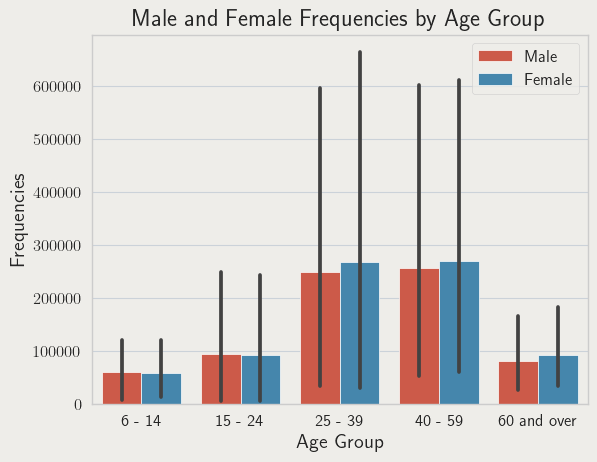

In [41]:
sns.barplot(x='age', y='read_amount', hue='gender', data=melted_df)

# Customize the plot
plt.xlabel('Age Group')
plt.ylabel('Frequencies')
plt.title('Male and Female Frequencies by Age Group')
plt.legend()

# Show the plot
plt.show()